# Bidirectional LSTM on IMDB

### Installing Necessary Libraries

In [39]:
pip install pandas numpy matplotlib seaborn transformers datasets

Note: you may need to restart the kernel to use updated packages.


In [40]:
pip install tensorflow keras

Note: you may need to restart the kernel to use updated packages.


In [41]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [56]:
pip install pydot graphviz

Note: you may need to restart the kernel to use updated packages.


In [59]:
!pip install pydot

In [64]:
pip install scikit-learn

  Using cached scipy-1.16.2-cp313-cp313-win_amd64.whl.metadata (60 kB)
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ---------------- ----------------------- 3.7/8.7 MB 64.6 MB/s eta 0:00:01
   ---------------------------------------- 8.7/8.7 MB 30.6 MB/s  0:00:00
Using cached scipy-1.16.2-cp313-cp313-win_amd64.whl (38.5 MB)

   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------

### Importing Libraries

In [43]:
import numpy as np
import keras
from keras import layers
from keras.models import Model

In [44]:
#only consider the top 20000 words in the dataset
max_features = 20000
#only cosider the first 200 words of each movie reviews
max_len = 200

### Model Building

In [45]:
input = keras.Input(shape=(None,), dtype="int32")
X = layers.Embedding(max_features,128)(input)
X = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(X)
X = layers.Dropout(0.5)(X)  # Add dropout after LSTM
X = layers.Bidirectional(layers.LSTM(64))(X)
X = layers.Dropout(0.5)(X)  # Add dropout after LSTM
X = layers.Dense(64, activation="relu")(X)
output = layers.Dense(1, activation = "sigmoid")(X)

In [46]:
model = keras.Model(input,output)
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, None)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_3 (Embedding)         │ (None, None, 128)      │     2,560,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_4 (Bidirectional) │ (None, None, 128)      │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, None, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_5 (Bidirectional) │ (None, 128)            │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,765,953 (10.55 MB)

 Trainable params: 2,765,953 (10.55 MB)

 Non-trainable params: 0 (0.00 B)

### load the IMDB Review Sentiment Data

In [47]:
(X_train, y_train), (X_val, y_val) = keras.datasets.imdb.load_data(num_words=max_features)
print(len(X_train), "Training sequences")
print(len(X_val), "Validation sequences")

25000 Training sequences
25000 Validation sequences


In [48]:
X_train = keras.preprocessing.sequence.pad_sequences(X_train, maxlen=max_len)
X_val = keras.preprocessing.sequence.pad_sequences(X_val, maxlen=max_len)

### Train & Evaluate the Model

In [49]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 84s 104ms/step - accuracy: 0.7986 - loss: 0.4200 - val_accuracy: 0.8685 - val_loss: 0.3101
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 79s 102ms/step - accuracy: 0.9231 - loss: 0.2109 - val_accuracy: 0.8721 - val_loss: 0.3348
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 102ms/step - accuracy: 0.9564 - loss: 0.1259 - val_accuracy: 0.7708 - val_loss: 0.7911
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 104ms/step - accuracy: 0.9623 - loss: 0.1088 - val_accuracy: 0.8582 - val_loss: 0.4943
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 104ms/step - accuracy: 0.9793 - loss: 0.0634 - val_accuracy: 0.8544 - val_loss: 0.5047
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 104ms/step - accuracy: 0.9827 - loss: 0.0558 - val_accuracy: 0.8493 - val_loss: 0.5498
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 106ms/step - accuracy: 0.9892 - loss: 0.0357 - val_accuracy: 0.8561 - val_loss: 0.5872
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 84s 107ms/step - accuracy: 0.9927 - loss: 0

### Visualizations

In [60]:
#visulaize the model
keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


Text(0, 0.5, 'Loss')

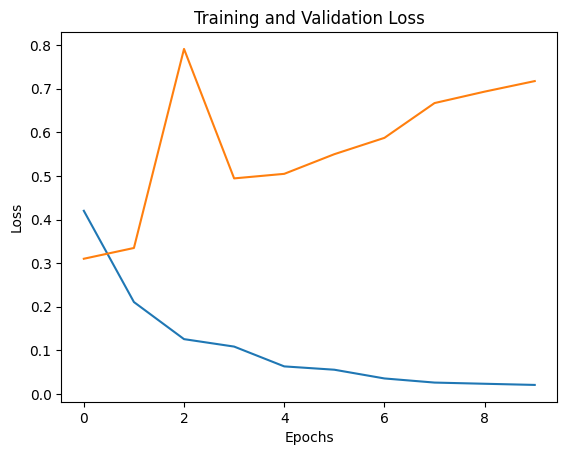

In [51]:
#visualize the outputs
import matplotlib.pyplot as plt 
import seaborn as sns
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Accuracy')

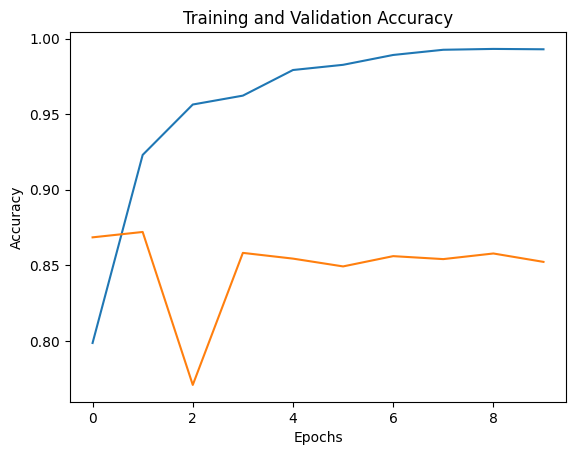

In [52]:
# visulaize accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

### Confusion matrix

782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 20ms/step


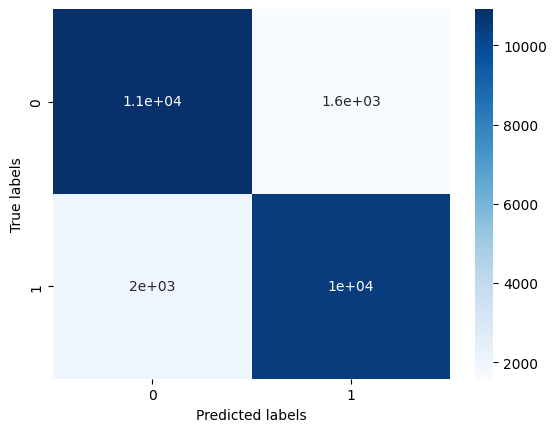

In [66]:
y_pred = model.predict(X_val)
y_pred = (y_pred > 0.5).astype("int32").flatten()  # Convert probabilities to binary labels

# Compute confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val, y_pred)

import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()